## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

In [170]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
import pandas as pd
INFILE = "C:/Users/Gurjivan/DataspellProjects/finm-portfolio-2024/data/multi_asset_etf_data.xlsx"

excess_returns=pd.read_excel(INFILE,sheet_name='excess returns').set_index('Date')
excess_returns.head()


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2011-02-28,0.006527,0.041620,-0.000527,0.035408,0.014264,-0.002174,0.045113,0.040056,0.002493,0.034647,0.007118
2011-03-31,0.008255,0.026409,0.062723,-0.024055,0.000251,-0.001719,-0.011107,0.016495,0.005348,-0.000052,0.011730
2011-04-30,0.048261,0.045015,0.026783,0.055715,0.015432,0.017868,0.046089,0.058127,0.018490,0.028418,0.023236
2011-05-31,-0.013447,-0.051625,-0.029301,-0.021962,0.001432,0.025156,0.010233,-0.041465,0.000099,-0.011115,0.002758
2011-06-30,-0.000270,-0.042817,-0.009528,-0.012280,-0.005878,-0.005217,-0.031233,-0.042754,-0.010948,-0.017042,0.007377


In [172]:
excess_return_mean=excess_returns.mean()*12
excess_return_mean.name="Mean"
excess_return_volatility=excess_returns.std()*math.sqrt(12)
excess_return_volatility.name=("Volatility")

Summary_statistics=pd.merge(excess_return_mean,excess_return_volatility,left_index=True,right_index=True)
Summary_statistics=pd.DataFrame(Summary_statistics)

Summary_statistics['Sharpe']=(Summary_statistics['Mean']/Summary_statistics['Volatility'])*math.sqrt(12)

In [173]:
print(Summary_statistics)

         Mean  Volatility    Sharpe
BWX -0.011888    0.081671 -0.504246
DBC -0.009086    0.168455 -0.186836
EEM  0.026960    0.179940  0.519023
EFA  0.055037    0.152203  1.252636
HYG  0.037356    0.077289  1.674320
IEF  0.013939    0.063197  0.764046
IYR  0.077912    0.169585  1.591499
PSP  0.092851    0.215238  1.494366
QAI  0.014959    0.049007  1.057387
SPY  0.126983    0.143066  3.074660
TIP  0.016844    0.051258  1.138368


In [174]:
print(f"The Best Sharpe Ratio is",Summary_statistics['Sharpe'].idxmax(),Summary_statistics['Sharpe'].max() )
print(f"The Worst Sharpe Ratio is", Summary_statistics['Sharpe'].idxmin(),Summary_statistics['Sharpe'].min() )

The Best Sharpe Ratio is SPY 3.0746604504049335
The Worst Sharpe Ratio is BWX -0.5042457533339207


## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

          BWX       DBC       EEM       EFA       HYG       IEF       IYR  \
BWX  1.000000  0.233222  0.638705  0.600620  0.620946  0.568903  0.562599   
DBC  0.233222  1.000000  0.516908  0.521447  0.471924 -0.300523  0.290040   
EEM  0.638705  0.516908  1.000000  0.820770  0.694174  0.020477  0.589003   
EFA  0.600620  0.521447  0.820770  1.000000  0.790742  0.018537  0.705926   
HYG  0.620946  0.471924  0.694174  0.790742  1.000000  0.180087  0.739567   
IEF  0.568903 -0.300523  0.020477  0.018537  0.180087  1.000000  0.297047   
IYR  0.562599  0.290040  0.589003  0.705926  0.739567  0.297047  1.000000   
PSP  0.552010  0.467111  0.761796  0.910596  0.814182  0.017486  0.753810   
QAI  0.662425  0.494467  0.791130  0.863957  0.811161  0.176287  0.718397   
SPY  0.466152  0.448389  0.699939  0.864822  0.794782 -0.005053  0.760646   
TIP  0.680001  0.114379  0.379465  0.386677  0.541758  0.745025  0.590805   

          PSP       QAI       SPY       TIP  
BWX  0.552010  0.662425  0.46

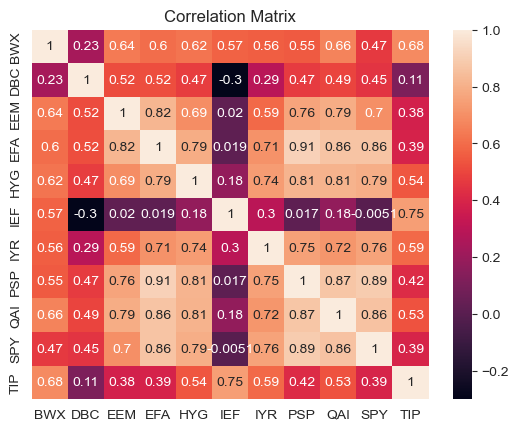

In [175]:
corr_matrix = excess_returns.corr()
print(corr_matrix)

sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [176]:
corr_unstacked=corr_matrix.unstack()
corr_unstacked=corr_unstacked[corr_unstacked!=1]
print(f"The Max correlation Pair is ",corr_unstacked.idxmax(),corr_unstacked.max())
print(f"The Min correlation Pair is ",corr_unstacked.idxmin(),corr_unstacked.min())

The Max correlation Pair is  ('EFA', 'PSP') 0.9105956995777845
The Min correlation Pair is  ('DBC', 'IEF') -0.30052272295503085


In [177]:
print(f"TIPS's performance",excess_return_mean['TIP'])
print(f"Foreign Bonds's performance",excess_return_mean['BWX'])
print(f"Domestic Bonds's performance in medium term",excess_return_mean['IEF'])
print("TIPS Has outperformed both Foreign Bonds and Domestic Bonds")

TIPS's performance 0.01684419863408347
Foreign Bonds's performance -0.01188831285877206
Domestic Bonds's performance in medium term 0.013938703453012364
TIPS Has outperformed both Foreign Bonds and Domestic Bonds


## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

In [178]:
def tangency_portfolio_weights(excess_returns: pd.DataFrame):
    """
    Calculate tangency portfolio weights from excess returns data.

    Parameters:
    excess_returns (pd.DataFrame): A DataFrame where rows are observations (e.g., time periods)
                                   and columns are assets, containing the excess returns.

    Returns:
    pd.Series: Weights of the tangency portfolio.
    """
    # Calculate mean and covariance of excess returns
    mean_excess_returns = excess_returns.mean()
    cov_matrix = excess_returns.cov()

    # Calculate inverse of covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calculate tangency portfolio weights
    weights = inv_cov_matrix @ mean_excess_returns
    weights /= weights.sum()  # Normalize weights to sum to 1

    return pd.Series(weights, index=excess_returns.columns)


In [179]:
w_t_tangency = tangency_portfolio_weights(excess_returns)
w_t_tangency=w_t_tangency.to_frame(w_t_tangency)
w_t_tangency.columns.values[0] = 'Tangency Weights'

In [180]:
print(w_t_tangency)

     Tangency Weights
BWX          2.730253
DBC         -0.111241
EEM         -0.615698
EFA          0.530692
HYG         -0.832578
IEF         -4.682480
IYR          0.877108
PSP          0.277002
QAI          7.220592
SPY         -4.904086
TIP          0.510436


In [181]:
Summary_statistics=pd.merge(Summary_statistics,w_t_tangency,left_index=True,right_index=True)
Summary_statistics

,Mean,Volatility,Sharpe,Tangency Weights
BWX,-0.011888,0.081671,-0.504246,2.730253
DBC,-0.009086,0.168455,-0.186836,-0.111241
EEM,0.026960,0.179940,0.519023,-0.615698
EFA,0.055037,0.152203,1.252636,0.530692
HYG,0.037356,0.077289,1.674320,-0.832578
IEF,0.013939,0.063197,0.764046,-4.682480
IYR,0.077912,0.169585,1.591499,0.877108
PSP,0.092851,0.215238,1.494366,0.277002
QAI,0.014959,0.049007,1.057387,7.220592
SPY,0.126983,0.143066,3.074660,-4.904086


Based on the data above we can see that the individual sharpe ratios do not align with the weights of the tangency portfolio. The goal of the portfolio is to maximize the sharpe of the portfolio. This is due to the fact that the tangency portfolio itself returns a negative sharpe during this portfolio which isn't common, so we should really be shorting the tangency portfolio and going long the risk free rate. 

In [182]:
tangency_return=np.transpose(Summary_statistics['Tangency Weights']) @  Summary_statistics['Mean']
tangency_risk=np.sqrt(np.transpose(Summary_statistics['Tangency Weights']) @   excess_returns.cov() @ Summary_statistics['Tangency Weights']) * np.sqrt(12)
tangency_sharpe= (tangency_return / tangency_risk) * np.sqrt(12)
print(f"Tangency Return: {tangency_return}")
print(f"Tangency Risk: {tangency_risk}")
print(f"Tangency Sharpe: {tangency_sharpe}")

Tangency Return: -0.5272759704594776
Tangency Risk: 0.328513333962669
Tangency Sharpe: -5.560010362013384


## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

TIPS Dropped Completely 

In [183]:
excess_returns_no_tip=excess_returns.drop(columns="TIP")
tan_weights_w_o_tips=tangency_portfolio_weights(excess_returns_no_tip)
tan_weights_w_o_tips=tan_weights_w_o_tips.to_frame(tan_weights_w_o_tips)
tan_weights_w_o_tips.columns.values[0] = 'Tangency Weights without TIPS'

In [184]:
Summary_statistics=pd.merge(Summary_statistics,tan_weights_w_o_tips,left_index=True,right_index=True,how='left')
Summary_statistics

,Mean,Volatility,Sharpe,Tangency Weights,Tangency Weights without TIPS
BWX,-0.011888,0.081671,-0.504246,2.730253,3.015911
DBC,-0.009086,0.168455,-0.186836,-0.111241,-0.090968
EEM,0.026960,0.179940,0.519023,-0.615698,-0.664230
EFA,0.055037,0.152203,1.252636,0.530692,0.540606
HYG,0.037356,0.077289,1.674320,-0.832578,-0.871637
IEF,0.013939,0.063197,0.764046,-4.682480,-4.832385
IYR,0.077912,0.169585,1.591499,0.877108,0.990156
PSP,0.092851,0.215238,1.494366,0.277002,0.324898
QAI,0.014959,0.049007,1.057387,7.220592,7.976911
SPY,0.126983,0.143066,3.074660,-4.904086,-5.389260


Increase TIP by .0012

In [185]:
excess_return_mean_newtip = excess_returns
excess_return_mean_newtip['TIP'] += .0012


tan_weights_w_newtip=tangency_portfolio_weights(excess_return_mean_newtip)
tan_weights_w_newtip=tan_weights_w_newtip.to_frame(tan_weights_w_newtip)
tan_weights_w_newtip.columns.values[0] = 'Tangency Weights with adjusted TIPS'



In [186]:
Summary_statistics=pd.merge(Summary_statistics,tan_weights_w_newtip,left_index=True,right_index=True,how='left')
Summary_statistics

,Mean,Volatility,Sharpe,Tangency Weights,Tangency Weights without TIPS,Tangency Weights with adjusted TIPS
BWX,-0.011888,0.081671,-0.504246,2.730253,3.015911,29.260095
DBC,-0.009086,0.168455,-0.186836,-0.111241,-0.090968,1.771624
EEM,0.026960,0.179940,0.519023,-0.615698,-0.664230,-5.123028
EFA,0.055037,0.152203,1.252636,0.530692,0.540606,1.451443
HYG,0.037356,0.077289,1.674320,-0.832578,-0.871637,-4.460119
IEF,0.013939,0.063197,0.764046,-4.682480,-4.832385,-18.604613
IYR,0.077912,0.169585,1.591499,0.877108,0.990156,11.376147
PSP,0.092851,0.215238,1.494366,0.277002,0.324898,4.725247
QAI,0.014959,0.049007,1.057387,7.220592,7.976911,77.462118
SPY,0.126983,0.143066,3.074660,-4.904086,-5.389260,-49.963644


Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

Equal Weights

In [187]:
n=len(Summary_statistics)
target=.01
Summary_statistics['Equal_Weights']=1/n



Risk Parity

In [188]:
Summary_statistics['Risk_Parity_Weights']=excess_returns.var()


Regularized

In [189]:
def regularized(excess_returns: pd.DataFrame):
    """
    Calculate tangency portfolio weights from excess returns data.

    Parameters:
    excess_returns (pd.DataFrame): A DataFrame where rows are observations (e.g., time periods)
                                   and columns are assets, containing the excess returns.

    Returns:
    pd.Series: Weights of the tangency portfolio.
    """
    # Calculate mean and covariance of excess returns
    mean_excess_returns = excess_returns.mean()
    cov_matrix = excess_returns.cov() *.5

    # Calculate inverse of covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calculate tangency portfolio weights
    weights = inv_cov_matrix @ mean_excess_returns
    weights /= weights.sum()  # Normalize weights to sum to 1

    return pd.Series(weights, index=excess_returns.columns)

regularized_weights=regularized(excess_returns)
regularized_weights=regularized_weights.to_frame(regularized_weights)
regularized_weights.columns.values[0] = 'Regularized_Weights'

Summary_statistics=pd.merge(Summary_statistics,regularized_weights,left_index=True,right_index=True,how='left')




Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [197]:
def summary_statistics_annualized(returns, annual_factor = 12):
    """This functions returns the summary statistics for the input total/excess returns passed
    into the function"""

    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annual_factor)

    return summary_statistics

Comparison=Summary_statistics[['Tangency Weights','Equal_Weights','Risk_Parity_Weights','Regularized_Weights']]

Comparison *= target / (excess_returns.mean()@Comparison)

Comparison


,Tangency Weights,Equal_Weights,Risk_Parity_Weights,Regularized_Weights
BWX,-0.630149,0.263004,0.070529,-0.568707
DBC,0.025675,0.263004,0.300052,-0.034434
EEM,0.142104,0.263004,0.342360,0.099573
EFA,-0.122485,0.263004,0.244948,-0.028211
HYG,0.192161,0.263004,0.063163,0.086688
IEF,1.080727,0.263004,0.042229,0.361604
IYR,-0.202439,0.263004,0.304089,-0.221110
PSP,-0.063933,0.263004,0.489853,-0.091841
QAI,-1.666529,0.263004,0.025395,-1.505575
SPY,1.131874,0.263004,0.216423,0.971107


In [198]:
summary_statistics_annualized(excess_returns @ Comparison) 

,Mean,Vol,Sharpe
Tangency Weights,0.12,0.075822,1.582662
Equal_Weights,0.12,0.282326,0.425040
Risk_Parity_Weights,0.12,0.299271,0.400974
Regularized_Weights,0.12,0.071055,1.688844
